# Graph Analysis with Networkx Using Snap Datasets

In this Notebook I will assess three large networks that can be freely downloaded from the Stanford Network Analysis project -- [Snap](https://snap.stanford.edu/). The three datasets are represented as undirected graphs, and a small description of them follows bellow:
* **Social circles from Facebook:** This dataset consists of 'circles' or 'friend lists' from Facebook. The complete description with statistics of the dataset can be download [here](https://snap.stanford.edu/data/egonets-Facebook.html).
* **General Relativity and Quantum Cosmology Collaboration:** This dataset consists of the collaboration network from the e-print [arxiv](https://snap.stanford.edu/data/ca-HepTh.html). The network is composed of scientific collaborations between authors. Nodes are authors, and a edge of node $i$ to node $j$ implies a collaboration of these two authors. The complete description with the summary of statistics of the dataset can be seen [here](https://snap.stanford.edu/data/ca-GrQc.html).
* **High Energy Physics - Theory Collaboration network:** Just like the previous network, the third dataset consists of the collaboration networks from arxiv, and covers collaborations between authors that submited papers to the High Energy Physics. The complete description and summary of statistics can be seem [here](https://snap.stanford.edu/data/ca-HepTh.html).

***

## Data Analysis
Let's use the [Networkx](http://networkx.github.io/) package to analyse the structure of the dataset. To plot charts, I'will be using the [matplotlib](https://matplotlib.org/) with the nice interface of [Seaborn](https://seaborn.pydata.org/). To understand better the structure of the data, let's use [Pandas](http://pandas.pydata.org/) series and dataframes to structure the data.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import pandas as pd

***

## Reading Some Graphs

To read a graph, let's call the `nx.read_edge_list` function. This function can easily read the collections from the snap repositories:

In [2]:
graph1 = nx.read_edgelist('./facebook_combined.txt', comments="#", delimiter=" ", create_using=nx.Graph())
graph2 = nx.read_edgelist('./CA-GrQc.txt', comments='#', delimiter='\t', create_using=nx.Graph())
graph3 = nx.read_edgelist('./CA-HepTh.txt', comments='#', delimiter='\t', create_using=nx.Graph())

To verify that the networks were correctly loaded, let's check the amount of nodes and edges in each network. As we can see bellow, the First Graph contains $4039$ nodes and $88234$ edges. For the second and third network, the respective amount of nodes are $5242$ and $9877$. The amount of edges for the second and third network are $14496$ and $25998$ respectively.

In [3]:
print("Number of nodes:", graph1.number_of_nodes(),"\t", graph2.number_of_nodes(), "\t", graph3.number_of_nodes())
print("Number of edges:", graph1.number_of_edges(),"\t", graph2.number_of_edges(), "\t", graph3.number_of_edges())

Number of nodes: 4039 	 5242 	 9877
Number of edges: 88234 	 14496 	 25998


Now that the graphs are correctly loaded, let's compute the first metric for each network.

***

## Node Degree

The node degree corresponds to the amount of neighbors that is linked to a node. It varies according to the two following properties:
* Undirected Graph: Is the amount of edges that connect a node $k_{i}$ to its neighbors.
* Directed Graph: Is the amount of incoming and outgoing edges of a Node. Thus, the degree of a node $k_i$ is $k_{i}^{out}+k_{i}^{in}$.

To retrieve the degree of each node is quite simple using networkx, the only thing necessary is to call the builtin function `networkx.degree()` in the library. The function receives as argument a graph and as a result returns a dictionary containing the degree of each node. Given the dictionary, we transform the data to a dataframe. We show the degree for the 5 first nodes bellow.

In [4]:
degreeGraph1 = pd.DataFrame(pd.Series(nx.degree(graph1)), columns=["Degree"])
degreeGraph2 = pd.DataFrame(pd.Series(nx.degree(graph2)), columns=["Degree"])
degreeGraph3 = pd.DataFrame(pd.Series(nx.degree(graph3)), columns=["Degree"])
degreeGraph1.head(5)

,Degree
0,347
1,17
10,10
100,9
1000,16


As we can see above, the first node indexed with name $0$ has a degree of $347$, the node indexed with name $1$ has a degree of $17$. The degree for the remaining edges can be visualized in the same way.

The degree is computed for each node for each graph. Since there are thousands of nodes in each graph,  it's insane to visualize the values node by node. To overcome this problem and get a feeling of the structure of the graph, a better approach is to visualize the degree distribution using a histogram.

The histogram bellow shows the degree distribution for each network, and it denotes the number of k-degree nodes in a network.
The $y$ axis is shared for the three graphs, and since this is a distribution, the values under the area adds-up to 1.

Another characteristic that is similar in all three graphs, is that some few nodes have large degrees. This makes the histogram really hard to visualize, since it's only possible see a single huge bin, and all remaining ones really small. To overcome this problem and smooth the visualization of the distribution, the $y$ axis must be transformed to the logarithm scale. The histogram with this transformation is as follows:

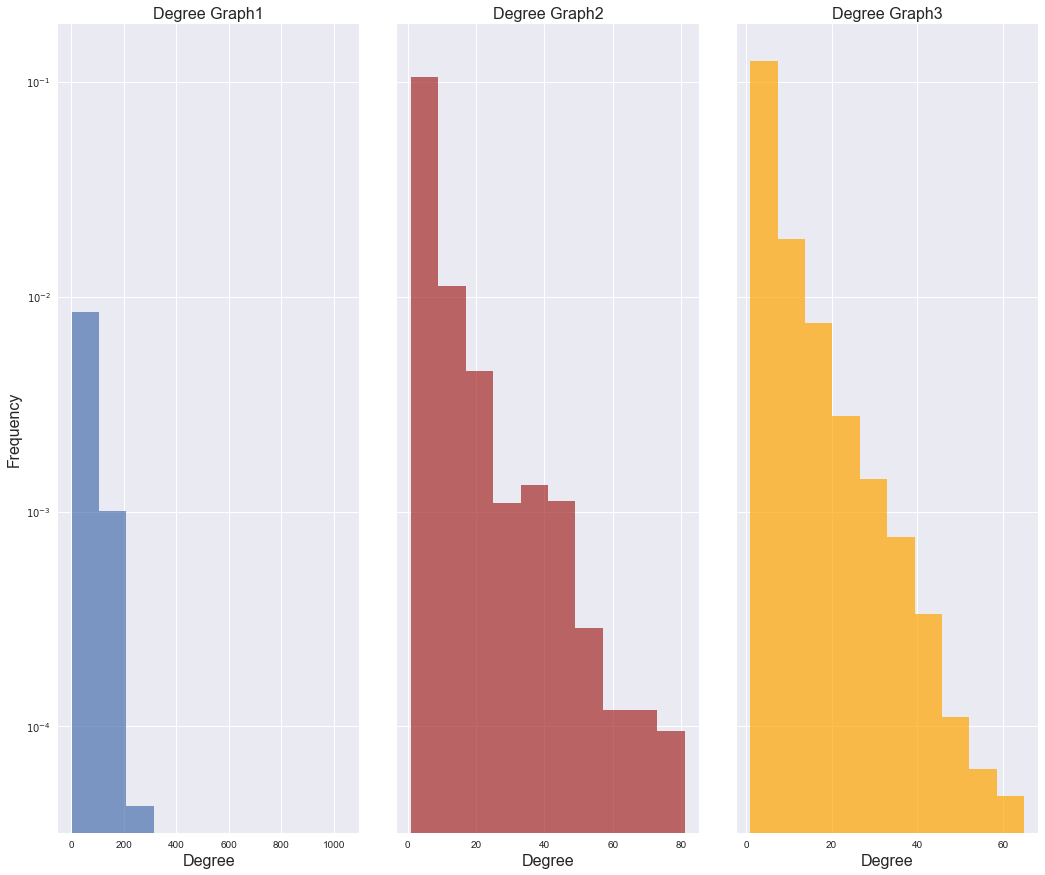

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
plt.style.use('seaborn-talk')
plt.tight_layout(pad = -18, h_pad = 1 , w_pad=2)
ax[0].hist(degreeGraph1['Degree'], alpha=0.7, normed=True, stacked=True, log=True)
ax[0].set_title('Degree Graph1', fontsize=16)
ax[0].set_xlabel('Degree', fontsize=16)
ax[0].set_ylabel('Frequency', fontsize=16)
ax[1].hist(degreeGraph2['Degree'], alpha=0.7, normed=True, stacked=True, log=True, color='brown')
ax[1].set_title('Degree Graph2', fontsize=16)
ax[1].set_xlabel('Degree', fontsize=16)
ax[2].hist(degreeGraph3['Degree'], alpha=0.7, normed=True, stacked=True, log=True, color='orange')
ax[2].set_title('Degree Graph3', fontsize=16)
ax[2].set_xlabel('Degree', fontsize=16)

As we can see above, the node distribution for the Graph1 shows that the higher percentage of nodes have a degree in the range $\left[1, 200\right]$. This means that most of the nodes in the graph have a degree in average of a $100$.

The degree distribution for the second and third graph are dissimilar than the first graph, since the collaboration network of authors have a smaller degree.

This has some sense, since in a social network such as Facebook, it's possible to be friends of someone without really being friends, which contrasts the collaboration networks, implying that althought they have smaller degrees, the connection are deeper.

Considering the second and third networks only, it's possible to visualize that the second and third networks have a similar distribution. The only difference is that the collaboration of authors in the Quantum Relativity and Cosmology are borader than the collaboration of authors in Physics.

## Clustering Coefficients

The clustering coefficient captures the degree to which the neighbors of a given node link to each other. In other words, for unweighted graphs, the degree of a node $\textit{u}$ is the fraction of possible triangles through that node that exist. In `networkx`, for undirected graphs, the following equations is used to compute the clustering coefficients:
<center>$c_{u} = \frac{2T(u)}{deg(u)(deg(u) - 1)}$,</center>
where $T(u)$ is the number of triangles through node *u* and $deg(u)$ is the degree of $u$.

Just like the previous metric, the degree distribution is easilly computed by calling the builtin function `nx.clustering()`. The clustering coefficient for each node indicates the local density of each node. This implies that if a node is connected/neighboor of every other node in the network, the higher will be its clustering coefficient.

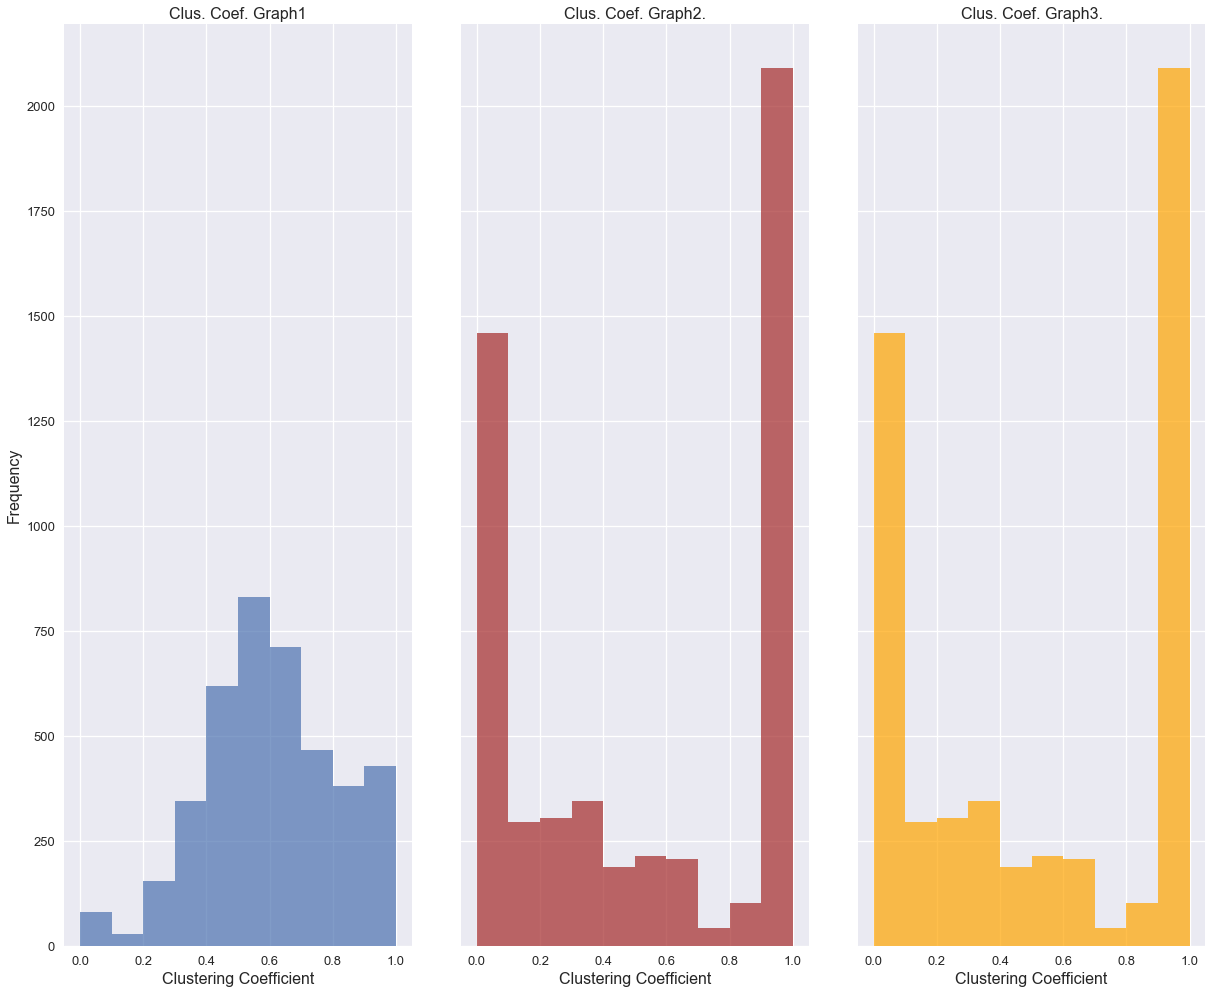

In [6]:
clusteringGraph1 = nx.clustering(graph1)
clusteringGraph2 = nx.clustering(graph2)
clusteringGraph3 = nx.clustering(graph3)
clusteringGraph1 = pd.DataFrame(pd.Series(clusteringGraph1), 
                            columns=["Clust.Coeff."])
clusteringGraph2 = pd.DataFrame(pd.Series(clusteringGraph2), 
                            columns=["Clust.Coeff."])
clusteringGraph3 = pd.DataFrame(pd.Series(clusteringGraph3), 
                            columns=["Clust.Coeff."])
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
plt.style.use('seaborn-talk')
plt.tight_layout(pad = -18, h_pad = 1 , w_pad=2)
ax[0].hist(clusteringGraph1['Clust.Coeff.'], normed=False, alpha=0.7, log=False)
ax[0].set_title('Clus. Coef. Graph1', fontsize=16)
ax[0].set_xlabel('Clustering Coefficient', fontsize=16)
ax[0].set_ylabel('Frequency', fontsize=16)
ax[1].hist(clusteringGraph2['Clust.Coeff.'], normed=False, alpha=0.7, log=False,  color='brown')
ax[1].set_title('Clus. Coef. Graph2.', fontsize=16)
ax[1].set_xlabel('Clustering Coefficient', fontsize=16)
ax[2].hist(clusteringGraph2['Clust.Coeff.'], normed=False, alpha=0.7, log=False,  color='orange')
ax[2].set_title('Clus. Coef. Graph3.', fontsize=16)
ax[2].set_xlabel('Clustering Coefficient', fontsize=16)

Since the clustering coefficients tells the probability that two neighbors of a node link to each other, we can infer that for the facebook social network, the majority of nodes assume gaussian distribution centered $0.6$. The coefficients allow us to infer that in a social network, the friendship relationship is not fully connected, implying that if a node $u$ is friend of a node $v$ that is friend of a node $w$, than not necessarily the node $u$ is friend of the node $w$ as well.

gets the  the frequency seems to follow a gaussian distribution curve with median of $0.55$. It's also possible to infer that for the majority of nodes, the probability of two independent nodes link to each other is above $50%$.

Just like the previous metric, the second and third graph are similar, with a higher probability of $\left[0.9, 1.\right]$ of chance for more than 2000 thousand of the nodes been linked with each other.

## Number of Connected Components and Their Sizes

In [7]:
number_components_graph1 = nx.number_connected_components(graph1)
number_components_graph2 = nx.number_connected_components(graph2)
number_components_graph3 = nx.number_connected_components(graph3)
print("Number Components Graph1:", number_components_graph1)
print("Number Components Graph2:", number_components_graph2)
print("Number Components Graph3:", number_components_graph3)

Number Components Graph1: 1
Number Components Graph2: 355
Number Components Graph3: 429


In [8]:
con_comp_graph1 = list(nx.connected_component_subgraphs(graph1))
con_comp_graph2 = list(nx.connected_component_subgraphs(graph2))
con_comp_graph3 = list(nx.connected_component_subgraphs(graph3))
scon_comp_graph1 = [nx.number_of_nodes(con_comp_graph1[x])  for x in range(0, len(con_comp_graph1), 1)]
scon_comp_graph2 = [nx.number_of_nodes(con_comp_graph2[x])  for x in range(0, len(con_comp_graph2), 1)]
scon_comp_graph3 = [nx.number_of_nodes(con_comp_graph3[x])  for x in range(0, len(con_comp_graph3), 1)]

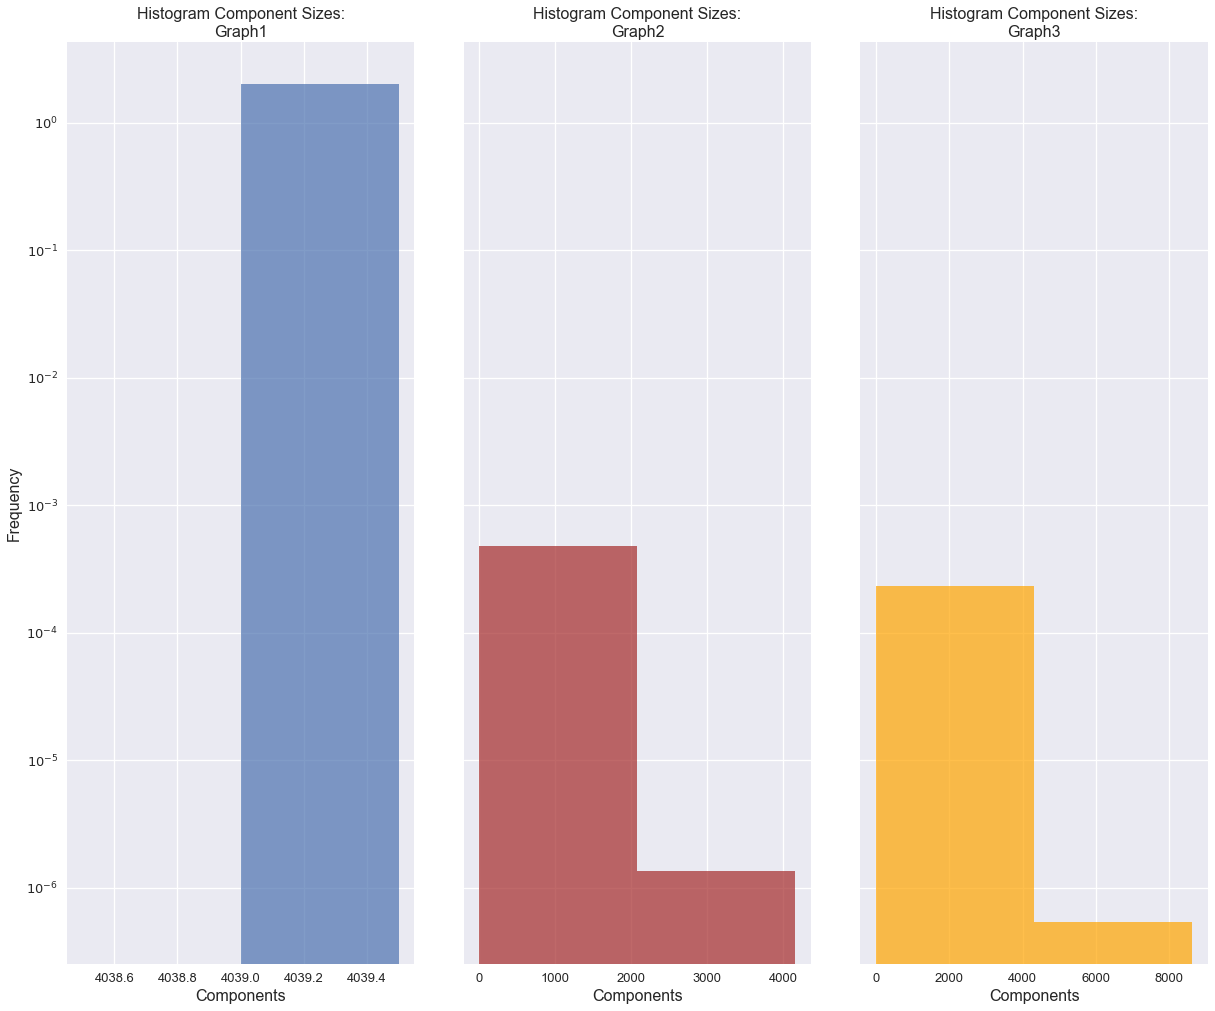

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
plt.style.use('seaborn-talk')
plt.tight_layout(pad = -18, h_pad = 1 , w_pad=2)
ax[0].hist(scon_comp_graph1, normed=True, bins=2, stacked=True, log=True, alpha=0.7)
ax[0].set_title('Histogram Component Sizes:\nGraph1', fontsize=16)
ax[0].set_xlabel('Components', fontsize=16)
ax[0].set_ylabel('Frequency', fontsize=16)
ax[1].hist(scon_comp_graph2, normed=True, bins=2, stacked=True, log=True, alpha=0.7, color='brown')
ax[1].set_title('Histogram Component Sizes:\nGraph2', fontsize=16)
ax[1].set_xlabel('Components', fontsize=16)
ax[2].hist(scon_comp_graph3, normed=True, bins=2, stacked=True, log=True, alpha=0.7, color='orange')
ax[2].set_title('Histogram Component Sizes:\nGraph3', fontsize=16)
ax[2].set_xlabel('Components', fontsize=16)

## Betweenness Centrality

In [10]:
betweenness_centrality_graph1 = nx.betweenness_centrality(graph1)
betweenness_centrality_graph2 = nx.betweenness_centrality(graph2)
betweenness_centrality_graph3 = nx.betweenness_centrality(graph3)
betweennessGraph1 = pd.DataFrame(pd.Series(betweenness_centrality_graph1), 
                                 columns=["Bet_Centrality"])
betweennessGraph2 = pd.DataFrame(pd.Series(betweenness_centrality_graph2),
                                 columns=["Bet_Centrality"])
betweennessGraph3 = pd.DataFrame(pd.Series(betweenness_centrality_graph3),
                                 columns=["Bet_Centrality"])

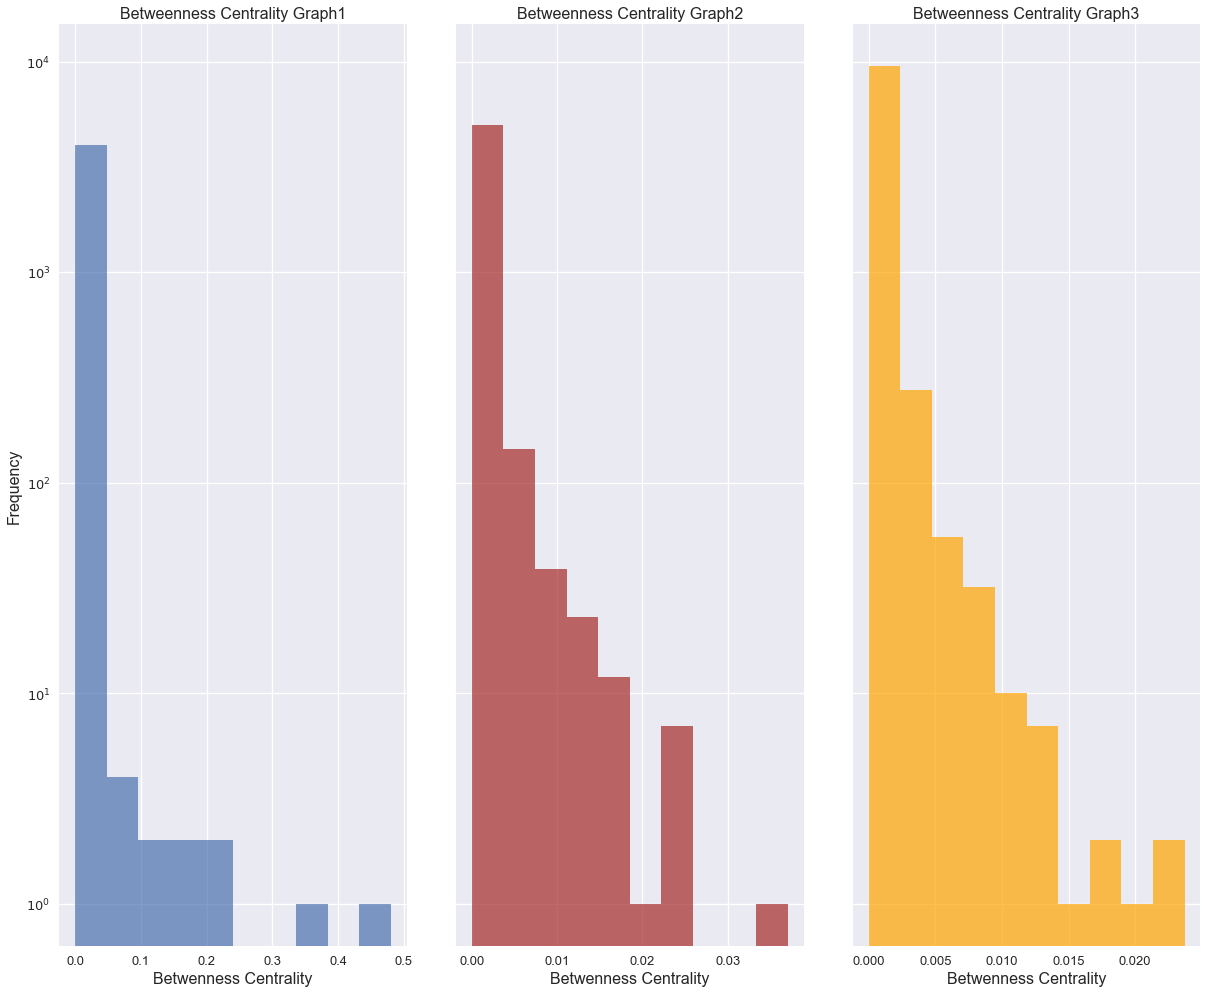

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
plt.style.use('seaborn-talk')
plt.tight_layout(pad = -18, h_pad = 1 , w_pad=2)
ax[0].hist(betweennessGraph1['Bet_Centrality'], normed=False, alpha=0.7, log=True)
ax[0].set_title('Betweenness Centrality Graph1', fontsize=16)
ax[0].set_xlabel('Betwenness Centrality', fontsize=16)
ax[0].set_ylabel('Frequency', fontsize=16)
ax[1].hist(betweennessGraph2['Bet_Centrality'], normed=False, alpha=0.7, log=True, color='brown')
ax[1].set_title('Betweenness Centrality Graph2', fontsize=16)
ax[1].set_xlabel('Betwenness Centrality', fontsize=16)
ax[2].hist(betweennessGraph3['Bet_Centrality'], normed=False, alpha=0.7, log=True, color='orange')
ax[2].set_title('Betweenness Centrality Graph3', fontsize=16)
ax[2].set_xlabel('Betwenness Centrality', fontsize=16)

## Closenness Centrality

In [12]:
closenness_centrality_graph1 = nx.closeness_centrality(graph1)
closenness_centrality_graph2 = nx.closeness_centrality(graph2)
closenness_centrality_graph3 = nx.closeness_centrality(graph3)
closennessGraph1 = pd.DataFrame(pd.Series(closenness_centrality_graph1), columns=["Clos_Centrality"])
closennessGraph2 = pd.DataFrame(pd.Series(closenness_centrality_graph2), columns=["Clos_Centrality"])
closennessGraph3 = pd.DataFrame(pd.Series(closenness_centrality_graph3), columns=["Clos_Centrality"])

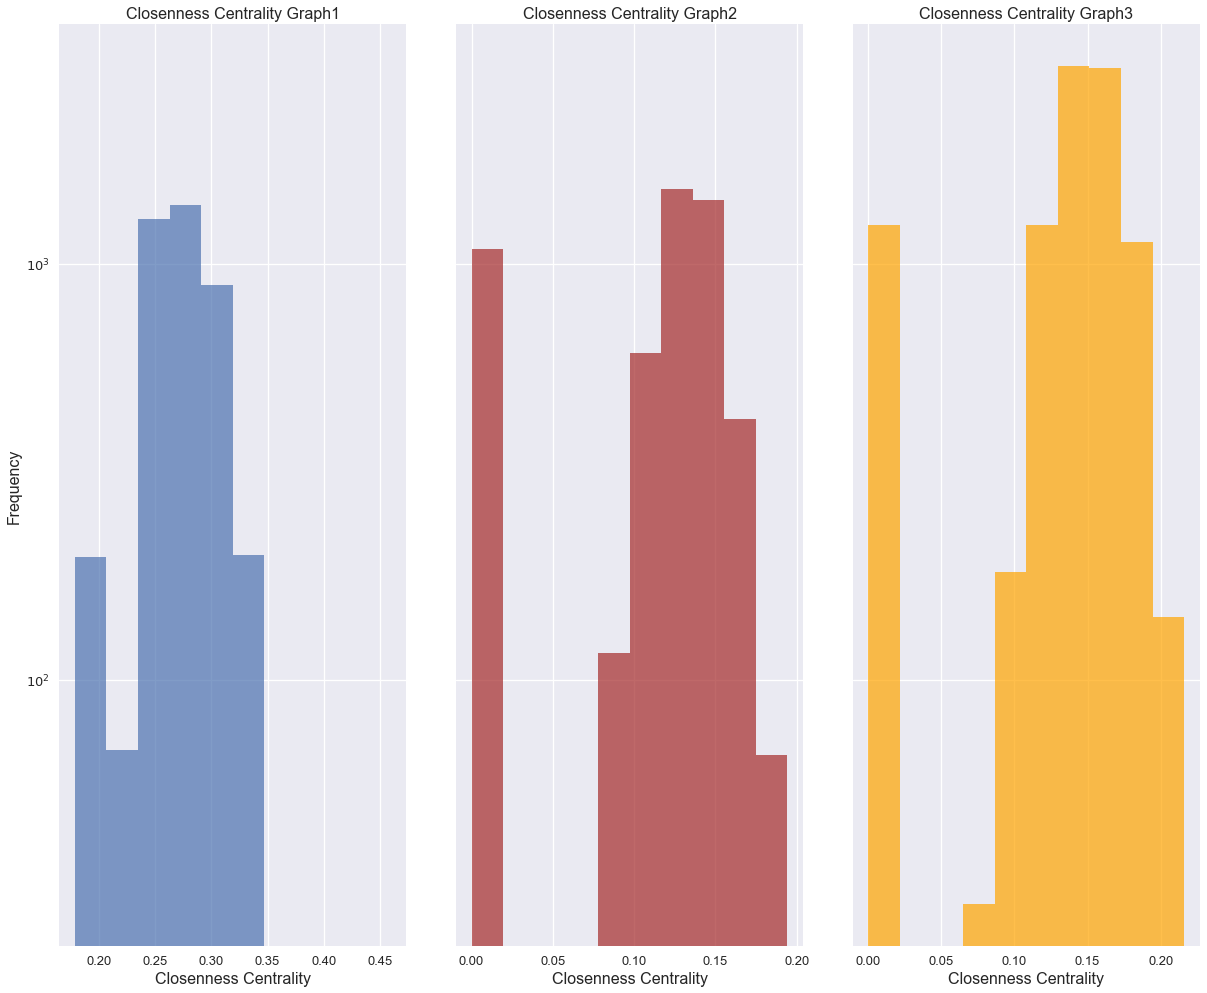

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
plt.style.use('seaborn-talk')
plt.tight_layout(pad = -18, h_pad = 1 , w_pad=2)
ax[0].hist(closennessGraph1['Clos_Centrality'], normed=False, alpha=0.7, log=True)
ax[0].set_title('Closenness Centrality Graph1', fontsize=16)
ax[0].set_xlabel('Closenness Centrality', fontsize=16)
ax[0].set_ylabel('Frequency', fontsize=16)
ax[1].hist(closennessGraph2['Clos_Centrality'], normed=False, alpha=0.7, log=True, color='brown')
ax[1].set_title('Closenness Centrality Graph2', fontsize=16)
ax[1].set_xlabel('Closenness Centrality', fontsize=16)
ax[2].hist(closennessGraph3['Clos_Centrality'], normed=False, alpha=0.7, log=True, color='orange')
ax[2].set_title('Closenness Centrality Graph3', fontsize=16)
ax[2].set_xlabel('Closenness Centrality', fontsize=16)


## Diameter

In [14]:
diameter_graph1 = list()
for subgraph in con_comp_graph1:
    diameter_graph1.append(nx.diameter(subgraph))
diameter_graph2 = list()
for subgraph in con_comp_graph2:
    diameter_graph2.append(nx.diameter(subgraph))
diameter_graph3 = list()
for subgraph in con_comp_graph3:
    diameter_graph3.append(nx.diameter(subgraph))

In [15]:
print("Maximum diameter for Graph1: ", len(diameter_graph1))
print("Maximum diameter for Graph2: ", len(diameter_graph2))
print("Maximum diameter for Graph2: ", len(diameter_graph3))

Maximum diameter for Graph1:  1
Maximum diameter for Graph2:  355
Maximum diameter for Graph2:  429


## Correlation Using Pearson and Spearman

In [16]:
pd_correlation = pd.DataFrame({'Degree G1':degreeGraph1.sort_values(by="Degree", ascending=False)['Degree'].values[0:1000],
                               'Degree G2':degreeGraph2.sort_values(by="Degree", ascending=False)['Degree'].values[0:1000],
                               'Degree G3':degreeGraph3.sort_values(by="Degree", ascending=False)['Degree'].values[0:1000],
                               'Betw. G1':betweennessGraph1.sort_values(by='Bet_Centrality', ascending=False)["Bet_Centrality"].values[0:1000],
                               'Betw. G2':betweennessGraph2.sort_values(by='Bet_Centrality', ascending=False)["Bet_Centrality"].values[0:1000],
                               'Betw. G3':betweennessGraph3.sort_values(by='Bet_Centrality', ascending=False)["Bet_Centrality"].values[0:1000],
                               'Clos. G1':closennessGraph1.sort_values(by='Clos_Centrality', ascending=False)["Clos_Centrality"].values[0:1000],
                               'Clos. G2':closennessGraph2.sort_values(by='Clos_Centrality', ascending=False)["Clos_Centrality"].values[0:1000],
                               'Clos. G3':closennessGraph3.sort_values(by='Clos_Centrality', ascending=False)["Clos_Centrality"].values[0:1000]
                              })

In [17]:
pd_correlation.corr(method='pearson')

,Betw. G1,Betw. G2,Betw. G3,Clos. G1,Clos. G2,Clos. G3,Degree G1,Degree G2,Degree G3
Betw. G1,1.000000,0.645528,0.669835,0.704327,0.349336,0.356622,0.759563,0.484791,0.469120
Betw. G2,0.645528,1.000000,0.993556,0.968479,0.889669,0.896370,0.890958,0.967485,0.956569
Betw. G3,0.669835,0.993556,1.000000,0.964312,0.888738,0.896832,0.916394,0.964774,0.955736
Clos. G1,0.704327,0.968479,0.964312,1.000000,0.822632,0.825061,0.885241,0.923676,0.903865
Clos. G2,0.349336,0.889669,0.888738,0.822632,1.000000,0.998184,0.844147,0.966477,0.981173
Clos. G3,0.356622,0.896370,0.896832,0.825061,0.998184,1.000000,0.845143,0.968010,0.983691
Degree G1,0.759563,0.890958,0.916394,0.885241,0.844147,0.845143,1.000000,0.872824,0.879759
Degree G2,0.484791,0.967485,0.964774,0.923676,0.966477,0.968010,0.872824,1.000000,0.994484
Degree G3,0.469120,0.956569,0.955736,0.903865,0.981173,0.983691,0.879759,0.994484,1.000000


In [18]:
pd_correlation.corr(method='spearman')

,Betw. G1,Betw. G2,Betw. G3,Clos. G1,Clos. G2,Clos. G3,Degree G1,Degree G2,Degree G3
Betw. G1,1.000000,0.999971,1.000000,0.999977,0.999995,1.000000,0.999938,0.997213,0.997647
Betw. G2,0.999971,1.000000,0.999971,0.999957,0.999967,0.999971,0.999917,0.997093,0.997637
Betw. G3,1.000000,0.999971,1.000000,0.999977,0.999995,1.000000,0.999938,0.997213,0.997647
Clos. G1,0.999977,0.999957,0.999977,1.000000,0.999973,0.999977,0.999919,0.997194,0.997622
Clos. G2,0.999995,0.999967,0.999995,0.999973,1.000000,0.999995,0.999937,0.997214,0.997644
Clos. G3,1.000000,0.999971,1.000000,0.999977,0.999995,1.000000,0.999937,0.997213,0.997645
Degree G1,0.999938,0.999917,0.999938,0.999919,0.999937,0.999937,1.000000,0.997195,0.997579
Degree G2,0.997213,0.997093,0.997213,0.997194,0.997214,0.997213,0.997195,1.000000,0.997168
Degree G3,0.997647,0.997637,0.997647,0.997622,0.997644,0.997645,0.997579,0.997168,1.000000
